In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
pd.options.display.max_rows = 4000
import pingouin as pg
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
import matplotlib
import statistics as stats




In [18]:
#prelimanary load of test data

fd = (r"C:\Users\varunn\Documents\Confluence attachments\upwork takehome case\case.xlsx")
gsv = pd.read_excel(fd,sheet_name='Sheet1')
flact = pd.read_excel(fd,sheet_name='Sheet2')

In [19]:
#subset data by region and aggreate by month
gsvna = gsv[gsv['Region']=='North America']
gsvmn = pd.DataFrame(gsvna.groupby(['Month'],as_index=False)[['Jobs Posted','Active Clients','Jobs Filled','Gross Services Value']].sum())
gsvmn['MM/YY'] = pd.to_datetime(gsvmn['Month']).dt.strftime('%m/%Y')
gsvmn = gsvmn.set_index('MM/YY')
gsvmn['fillrate'] = gsvmn['Jobs Filled'] /gsvmn ['Jobs Posted']

In [ ]:
#subset data by region and aggreate by month
flactna = flact[flact['Freelancer Region']=='North America']
flactna['MM/YY'] = pd.to_datetime(flactna['Week'].dt.strftime('%m/%Y'))
flactnm = pd.DataFrame(flactna.groupby(['MM/YY'],as_index=False)[['Registrations','Applications','Earnings']].sum())
flactnm = flactnm.set_index('MM/YY')
flactnm['apptoregis'] = flactnm['Applications'] / flactnm['Registrations']



Text(0, 0.5, 'gsv')

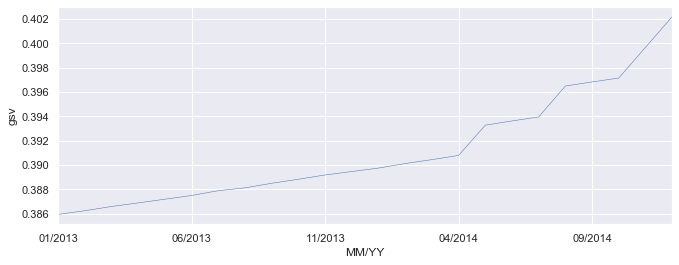

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
gsvmn['fillrate'].plot(linewidth=.5).set_ylabel('gsv')



Text(0, 0.5, 'fl')

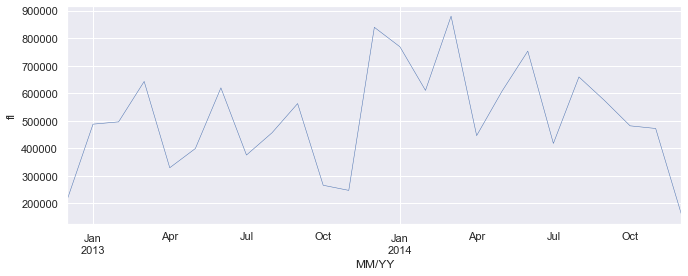

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})
flactnm['Applications'].plot(linewidth=.5).set_ylabel('fl')


In [50]:
#scale the data to view trend across 
scaler = MinMaxScaler ()
 
flactnm['Registrationsscale'] = scaler.fit_transform(flactnm['Registrations'].values.reshape(-1,1))
flactnm['Earningssscale'] = scaler.fit_transform(flactnm['Earnings'].values.reshape(-1,1))
flactnm['Applicationsscale'] = scaler.fit_transform(flactnm['Applications'].values.reshape(-1,1))


In [12]:
flact['Week1'] = flact['Week']
flact = flact.set_index("Week1")


In [14]:
flact['weekdayname'] = flact.index.weekday_name

In [ ]:
flact

Text(0.5, 1.0, 'Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')

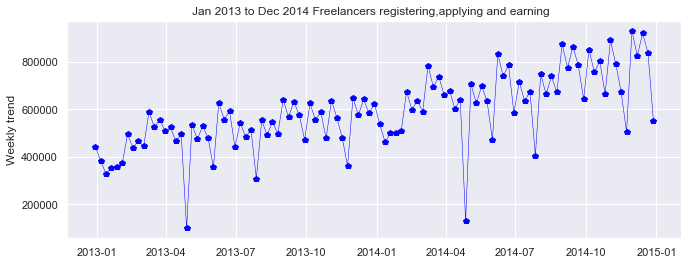

In [16]:
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 8)})


ax.plot(flact[(flact['Freelancer Region']=='North America')]['Earnings'],linewidth=.5,color='Blue',marker='p',linestyle='-') 

ax.set_ylabel('Weekly trend')
ax.set_title('Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')

Text(0.5, 1.0, 'Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')

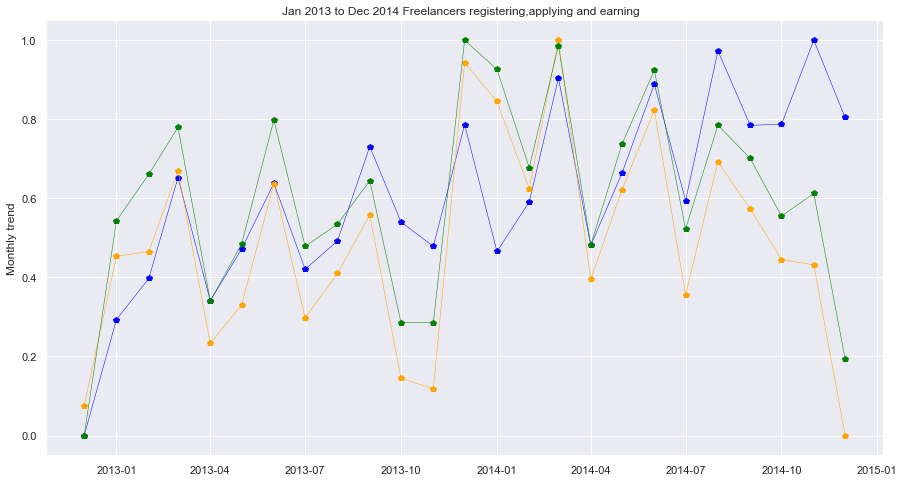

In [52]:
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 8)})

ax.plot(flactnm['Earningssscale'],linewidth=.5,color='Blue',marker='p',linestyle='-') 
ax.plot(flactnm['Applicationsscale'],linewidth=.5,color='Orange',marker='p',linestyle='-') 
ax.plot(flactnm['Registrationsscale'],linewidth=.5,color='Green',marker='p',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')

In [48]:
flacteu = flact[flact['Freelancer Region']=='EMEA']
flacteu['MM/YY'] = pd.to_datetime(flacteu['Week'].dt.strftime('%m/%Y'))
flactmeu = pd.DataFrame(flacteu.groupby(['MM/YY'],as_index=False)[['Registrations','Applications','Earnings']].sum())
flactmeu = flactmeu.set_index('MM/YY')
flactmeu['Registrationsscale'] = scaler.fit_transform(flactmeu['Registrations'].values.reshape(-1,1))
flactmeu['Earningscale'] = scaler.fit_transform(flactmeu['Earnings'].values.reshape(-1,1))
flactmeu['Applicationsscale'] = scaler.fit_transform(flactmeu['Applications'].values.reshape(-1,1))



c:\users\varunn\appdata\local\continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')

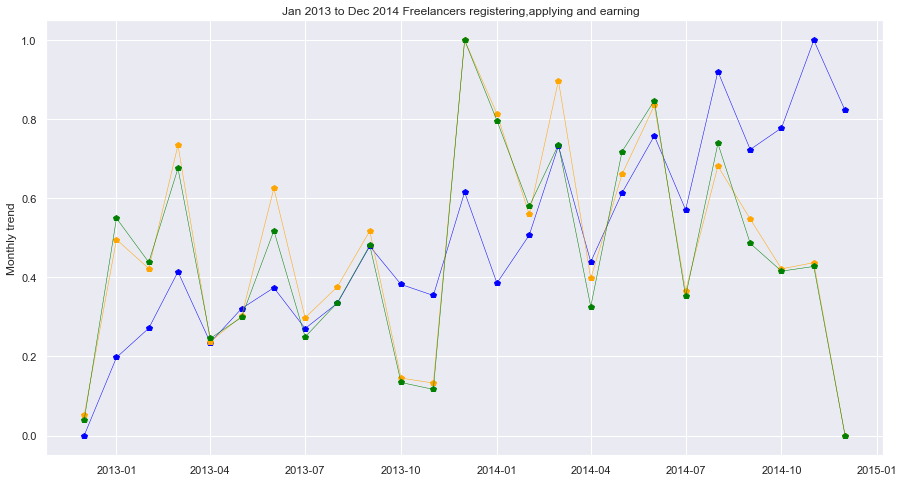

In [54]:
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 8)})

ax.plot(flactmeu['Earningscale'],linewidth=.5,color='Blue',marker='p',linestyle='-') 
ax.plot(flactmeu['Applicationsscale'],linewidth=.5,color='Orange',marker='p',linestyle='-') 
ax.plot(flactmeu['Registrationsscale'],linewidth=.5,color='Green',marker='p',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014 Freelancers registering,applying and earning  ')


In [334]:
# GSV NA 

gsvmn['Jobs Posted scale'] = scaler.fit_transform(gsvmn['Jobs Posted'].values.reshape(-1,1))
gsvmn['Active Clients scale'] = scaler.fit_transform(gsvmn['Active Clients'].values.reshape(-1,1))
gsvmn['Jobs Filled scale'] = scaler.fit_transform(gsvmn['Jobs Filled'].values.reshape(-1,1))
gsvmn['Gross Services Value scale'] = scaler.fit_transform(gsvmn['Gross Services Value'].values.reshape(-1,1))
gsvmn['fillrate scale'] = scaler.fit_transform(gsvmn['fillrate'].values.reshape(-1,1))
gsvmn['rationjobtoclients'] =gsvmn['Jobs Posted'] /gsvmn['Active Clients']

Text(0, 0.5, 'gsv')

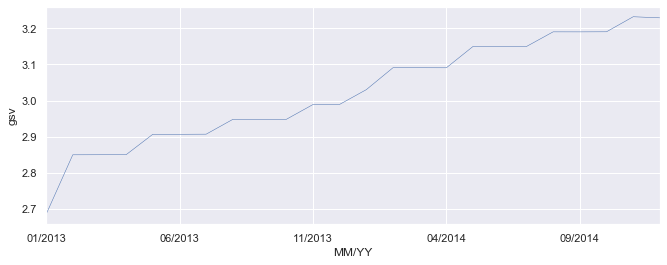

In [341]:
sns.set(rc={'figure.figsize':(11, 4)})
#gsvmn['Active Clients scale'].plot(linewidth=.5).set_ylabel('gsv')
#gsvmn['Jobs Posted scale'].plot(linewidth=.5).set_ylabel('gsv')
gsvmn['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')
#gsvmn['Jobs Filled scale'].plot(linewidth=.5).set_ylabel('gsv')
#gsvmn['Gross Services Value scale'].plot(linewidth=.5).set_ylabel('gsv')
#gsvmn['fillrate scale'].plot(linewidth=.5).set_ylabel('gsv')

In [21]:
# same analysis but for Europe
gsveu = gsv[gsv['Region']=='EMEA']
gsvmeu = pd.DataFrame(gsveu.groupby(['Month'],as_index=False)[['Jobs Posted','Active Clients','Jobs Filled','Gross Services Value']].sum())
gsvmeu['MM/YY'] = pd.to_datetime(gsvmeu['Month']).dt.strftime('%m/%Y')
gsvmeu = gsvmeu.set_index('MM/YY')
gsvmeu['fillrate'] = gsvmeu['Jobs Filled'] /gsvmeu ['Jobs Posted']
gsvmeu['Jobs Posted scale'] = scaler.fit_transform(gsvmeu['Jobs Posted'].values.reshape(-1,1))
gsvmeu['Active Clients scale'] = scaler.fit_transform(gsvmeu['Active Clients'].values.reshape(-1,1))
gsvmeu['Jobs Filled scale'] = scaler.fit_transform(gsvmeu['Jobs Filled'].values.reshape(-1,1))
gsvmeu['Gross Services Value scale'] = scaler.fit_transform(gsvmeu['Gross Services Value'].values.reshape(-1,1))
gsvmeu['fillrate scale'] = scaler.fit_transform(gsvmeu['fillrate'].values.reshape(-1,1))
gsvmeu['rationjobtoclients'] =gsvmeu['Jobs Posted'] /gsvmeu['Active Clients']

Text(0, 0.5, 'gsv')

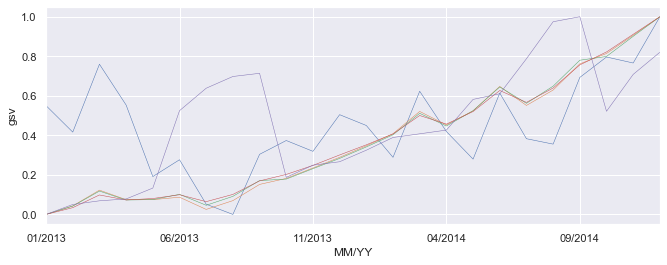

In [346]:
sns.set(rc={'figure.figsize':(11, 4)})
gsvmeu['Active Clients scale'].plot(linewidth=.5).set_ylabel('gsv')
gsvmeu['Jobs Posted scale'].plot(linewidth=.5).set_ylabel('gsv')
#gsvmeu['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')
gsvmeu['Jobs Filled scale'].plot(linewidth=.5).set_ylabel('gsv')
gsvmeu['Gross Services Value scale'].plot(linewidth=.5).set_ylabel('gsv')
gsvmeu['fillrate scale'].plot(linewidth=.5).set_ylabel('gsv')

In [482]:
gsveu = gsveu.set_index('MM/YY')


In [ ]:
categoryn = gsvna[gsvna['Category']=='Design']
categoryn['fillrate'] = categoryn['Jobs Filled'] /categoryn['Jobs Posted']
categoryn['Jobs Posted scale'] = scaler.fit_transform(categoryn['Jobs Posted'].values.reshape(-1,1))
categoryn['Active Clients scale'] = scaler.fit_transform(categoryn['Active Clients'].values.reshape(-1,1))
categoryn['Jobs Filled scale'] = scaler.fit_transform(categoryn['Jobs Filled'].values.reshape(-1,1))
categoryn['Gross Services Value scale'] = scaler.fit_transform(categoryn['Gross Services Value'].values.reshape(-1,1))
categoryn['fillrate scale'] = scaler.fit_transform(categoryn['fillrate'].values.reshape(-1,1))
categoryn['rationjobtoclients'] =categoryn['Jobs Posted'] /categoryn['Active Clients']
#categorynadmin = categoryn
categoryndesign = categoryn
#categorynIT = categoryn

In [ ]:
categorynadmin['GSVJobFilled'] = categorynadmin['Gross Services Value'] /categorynadmin['Jobs Filled']
categorynadmin['GSVJobFilled scale'] = scaler.fit_transform(categorynadmin['GSVJobFilled'].values.reshape(-1,1))

In [ ]:
categoryeu = gsveu[gsveu['Category']=='IT & Programming']
categoryeu['fillrate'] = categoryeu['Jobs Filled'] /categoryeu['Jobs Posted']
categoryeu['Jobs Posted scale'] = scaler.fit_transform(categoryeu['Jobs Posted'].values.reshape(-1,1))
categoryeu['Active Clients scale'] = scaler.fit_transform(categoryeu['Active Clients'].values.reshape(-1,1))
categoryeu['Jobs Filled scale'] = scaler.fit_transform(categoryeu['Jobs Filled'].values.reshape(-1,1))
categoryeu['Gross Services Value scale'] = scaler.fit_transform(categoryeu['Gross Services Value'].values.reshape(-1,1))
categoryeu['fillrate scale'] = scaler.fit_transform(categoryeu['fillrate'].values.reshape(-1,1))
categoryeu['rationjobtoclients'] =categoryeu['Jobs Posted'] /categoryeu['Active Clients']
#categoryeuadmin = categoryeu
#categoryeudesign = categoryeu
categoryeuIT = categoryeu

Text(0, 0.5, 'gsv')

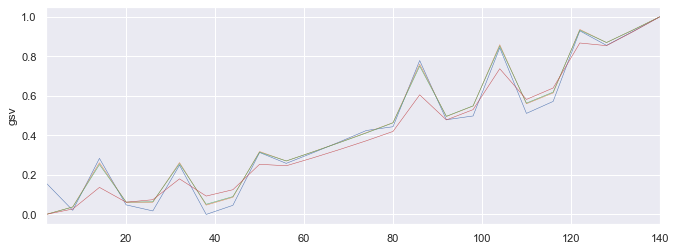

In [145]:
#Admin NA
sns.set(rc={'figure.figsize':(11, 4)})
categorynadmin['Active Clients scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynadmin['Jobs Posted scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynadmin['Jobs Filled scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynadmin['Gross Services Value scale'].plot(linewidth=.5).set_ylabel('gsv')
#categorynadmin['fillrate scale'].plot(linewidth=.5).set_ylabel('gsv')
#categorynadmin['fillrate'].plot(linewidth=.5).set_ylabel('gsv')
#categorynadmin['GSVJobFilled'].plot(linewidth=.5).set_ylabel('gsv')
#categoryn['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')


Text(0, 0.5, 'gsv')

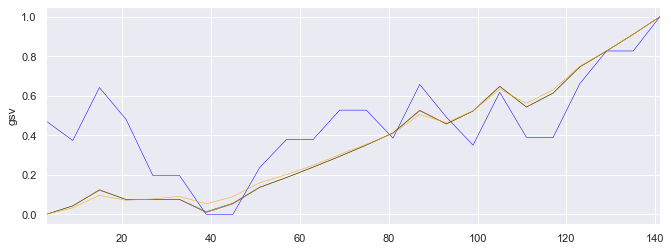

In [39]:
#Admin EU
sns.set(rc={'figure.figsize':(11, 4)})
categoryeuadmin['Active Clients scale'].plot(linewidth=.5,color='Blue').set_ylabel('gsv')
categoryeuadmin['Jobs Posted scale'].plot(linewidth=.5,color='Red').set_ylabel('gsv')
categoryeuadmin['Jobs Filled scale'].plot(linewidth=.5,color='Green').set_ylabel('gsv')
categoryeuadmin['Gross Services Value scale'].plot(linewidth=.5,color='Orange').set_ylabel('gsv')
#categoryeu['fillrate'].plot(linewidth=.5,color='black').set_ylabel('gsv')
#categoryeu['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')

Text(0, 0.5, 'gsv')

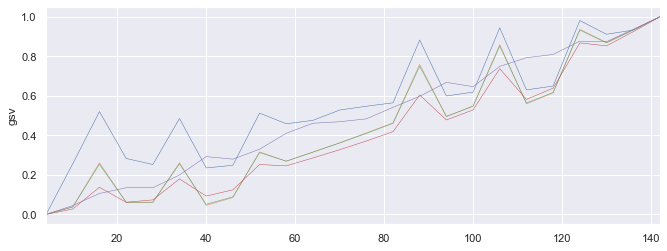

In [146]:
#Design NA
sns.set(rc={'figure.figsize':(11, 4)})
 
categoryndesign['Active Clients scale'].plot(linewidth=.5).set_ylabel('gsv')
categoryndesign['Jobs Posted scale'].plot(linewidth=.5).set_ylabel('gsv')
categoryndesign['Jobs Filled scale'].plot(linewidth=.5).set_ylabel('gsv')
categoryndesign['Gross Services Value scale'].plot(linewidth=.5).set_ylabel('gsv')
categoryndesign['fillrate scale'].plot(linewidth=.5).set_ylabel('gsv')
#categoryn['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')


Text(0, 0.5, 'gsv')

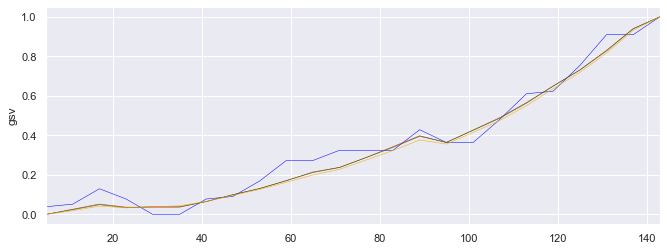

In [40]:
#Design EU
sns.set(rc={'figure.figsize':(11, 4)})
categoryeudesign['Active Clients scale'].plot(linewidth=.5,color='Blue').set_ylabel('gsv')
categoryeudesign['Jobs Posted scale'].plot(linewidth=.5,color='Red').set_ylabel('gsv')
categoryeudesign['Jobs Filled scale'].plot(linewidth=.5,color='Green').set_ylabel('gsv')
categoryeudesign['Gross Services Value scale'].plot(linewidth=.5,color='Orange').set_ylabel('gsv')
#categoryeu['fillrate'].plot(linewidth=.5,color='black').set_ylabel('gsv')
#categoryeu['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')

Text(0, 0.5, 'gsv')

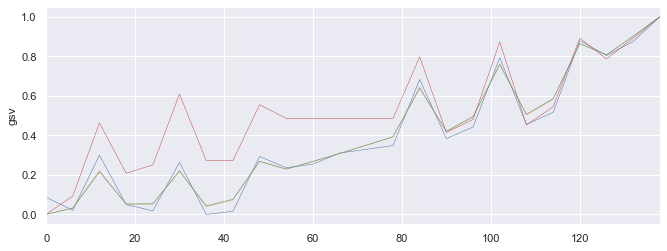

In [147]:
#IT & Programming NA
sns.set(rc={'figure.figsize':(11, 4)})
 
categorynIT['Active Clients scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynIT['Jobs Posted scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynIT['Jobs Filled scale'].plot(linewidth=.5).set_ylabel('gsv')
categorynIT['Gross Services Value scale'].plot(linewidth=.5).set_ylabel('gsv')
#categoryn['fillrate'].plot(linewidth=.5).set_ylabel('gsv')
#categoryn['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')

Text(0.5, 1.0, 'Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')

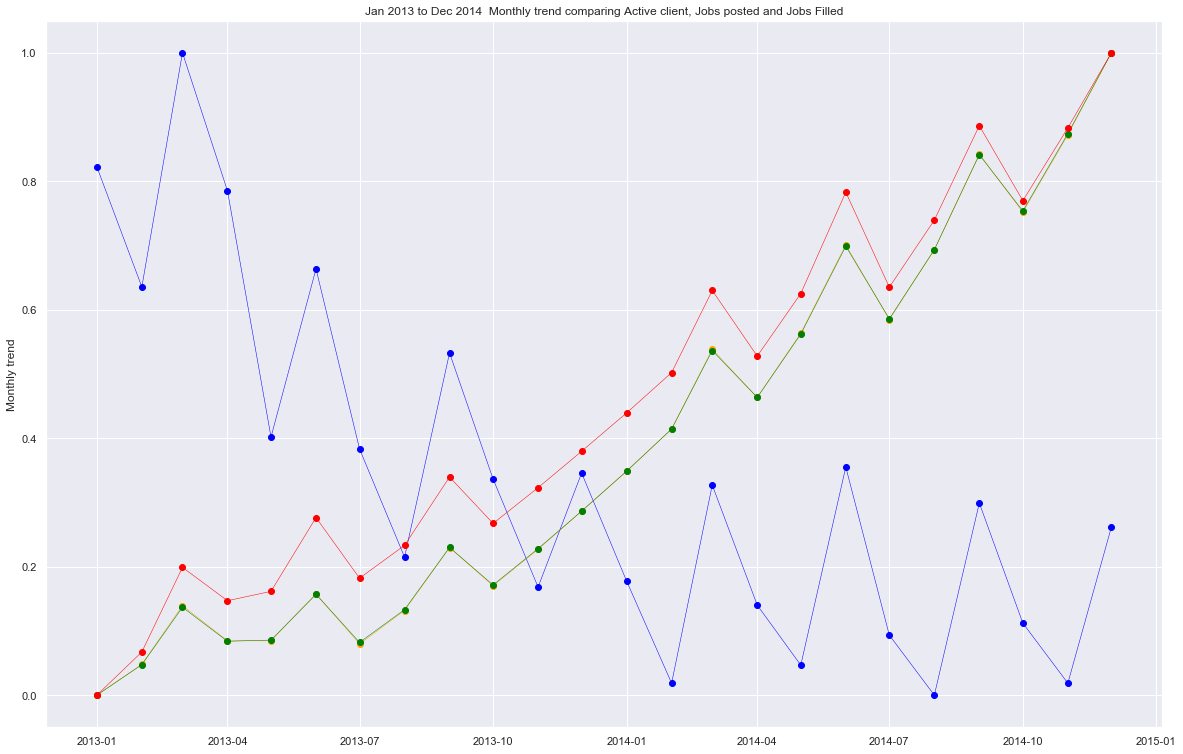

In [47]:
#IT and Programing EU
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 9)})
ax.plot(categoryeuIT['Active Clients scale'],linewidth=.5,color='Blue',marker='o',linestyle='-')
ax.plot(categoryeuIT['Jobs Posted scale'],linewidth=.5,color='Orange',marker='o',linestyle='-')
ax.plot(categoryeuIT['Jobs Filled scale'],linewidth=.5,color='Green',marker='o',linestyle='-') 
ax.plot(categoryeuIT['Gross Services Value scale'],linewidth=.5,color='Red',marker='o',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')

#categoryeuIT['fillrate'].plot(linewidth=.5,color='black').set_ylabel('gsv')
#categoryeuIT['rationjobtoclients'].plot(linewidth=.5).set_ylabel('gsv')

In [ ]:
#from matplotlib.dates import date2num
#import datetime

#x = [
#    datetime.datetime(2011, 1, 4, 0, 0),
#    datetime.datetime(2011, 1, 5, 0, 0),
#    datetime.datetime(2011, 1, 6, 0, 0)
#]
#x = date2num(x)

#x  = pd.date_range('2013-1-1','2014-12-01', freq='MS').tolist()
#x= matplotlib.dates.date2num(x)

#y = [4, 9, 2]
#z = [1, 2, 3]
#k = [11, 12, 13]

#ax = plt.subplot(111)
#ax.bar(x-0.2, y, width=0.2, color='b', align='center')
#ax.bar(x, z, width=0.2, color='g', align='center')
#ax.bar(x+0.2, k, width=0.2, color='r', align='center')
#ax.xaxis_date()

#plt.show()

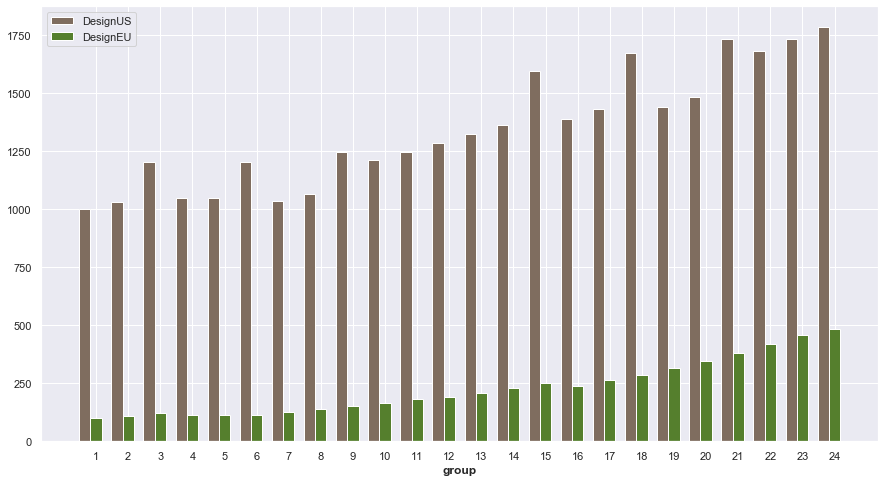

In [241]:
#revenue by category NA

# set width of bar
barWidth = 0.35
 
# set height of bar



bars1 = categoryndesign['Jobs Posted']
bars2 = categoryeudesign['Jobs Posted']
#bars1 = gsvna[gsvna['Category']=='Admin']['Gross Services Value']
#bars2 = gsvna[gsvna['Category']=='Design']['Gross Services Value']
#bars3 = gsvna[gsvna['Category']=='IT & Programming']['Gross Services Value']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]


 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='DesignUS')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='DesignEU')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='IT')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
 
# Create legend & Show graphic
plt.legend()
plt.show()


 

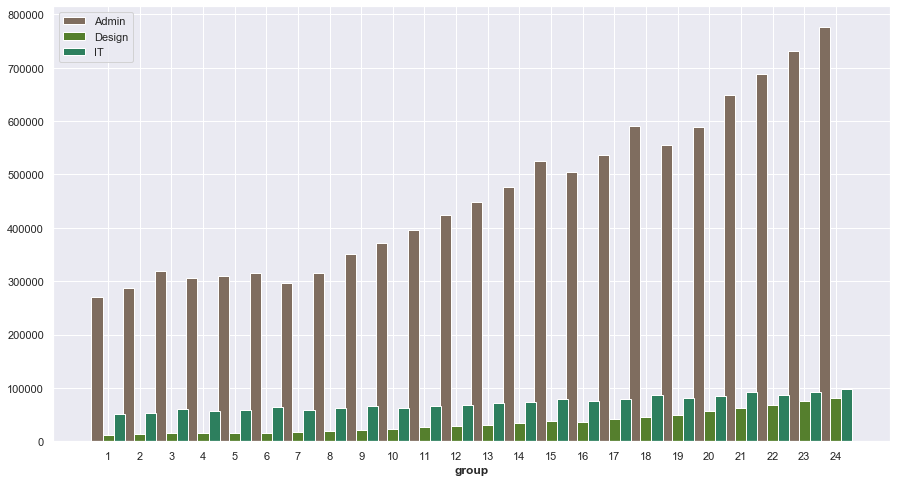

In [225]:
#revenue by category EU

# set width of bar
barWidth = 0.35
 
# set height of bar
bars1 = gsveu[gsveu['Category']=='Admin']['Gross Services Value']
bars2 = gsveu[gsveu['Category']=='Design']['Gross Services Value']
bars3 = gsveu[gsveu['Category']=='IT & Programming']['Gross Services Value']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Admin')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Design')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='IT')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [622]:
#stats.mean(gsvna[(gsvna['Category'] == 'IT & Programming')&(gsvna['Month']>'2013-12-1')]['Active Clients'].pct_change().fillna(0))*100.00

Text(0.5, 1.0, 'Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')

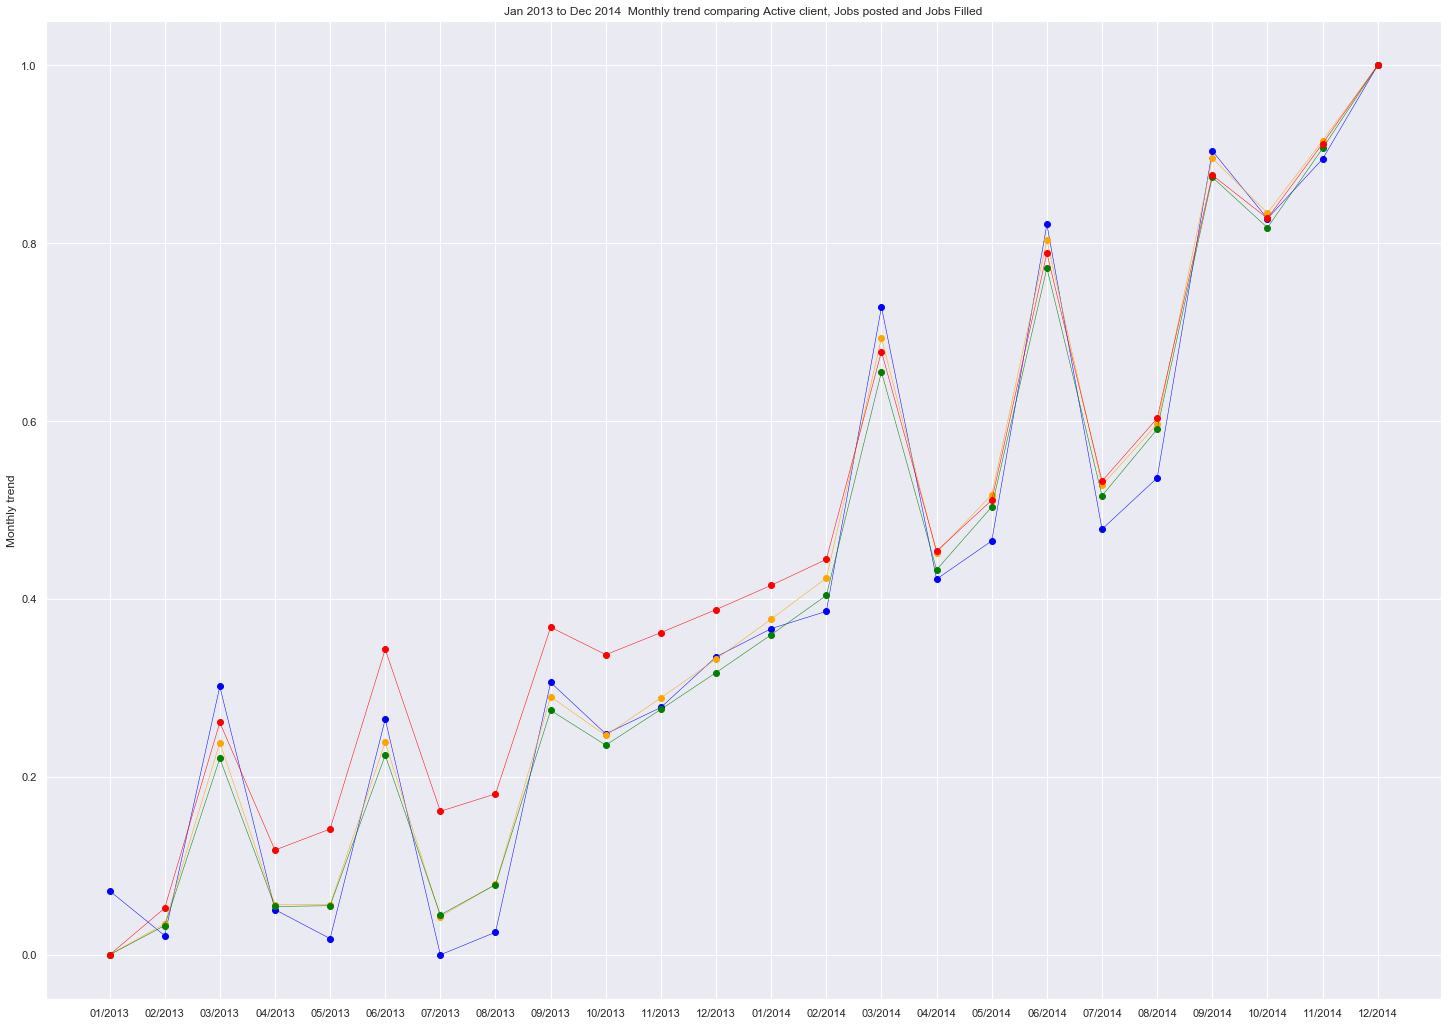

In [596]:
gsvmn
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(25, 18)})
ax.plot(gsvmn['Active Clients scale'],linewidth=.5,color='Blue',marker='o',linestyle='-')
ax.plot(gsvmn['Jobs Posted scale'],linewidth=.5,color='Orange',marker='o',linestyle='-')
ax.plot(gsvmn['Jobs Filled scale'],linewidth=.5,color='Green',marker='o',linestyle='-') 
ax.plot(gsvmn['Gross Services Value scale'],linewidth=.5,color='Red',marker='o',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')

In [230]:
categorynIT['Month1'] = categorynIT['Month']
categorynIT = categorynIT.set_index('Month1')

c:\users\varunn\appdata\local\continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
total = gsvmn[['Month','Gross Services Value']]
total.head(5)
categorynIT['MTotalGSV'] = total['Gross Services Value']
categorynIT['gsvperct'] = categorynIT['Gross Services Value'] / categorynIT['MTotalGSV']
categorynIT['gsvpctchange'] = categorynIT['Gross Services Value'].pct_change()
 


In [212]:
categoryndesign['jppctchange'] = categoryndesign['Jobs Posted'].pct_change()

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value,Year,Job posted Active Clients,Fill rate,...,Jobs Posted scale,Active Clients scale,Jobs Filled scale,Gross Services Value scale,fillrate scale,rationjobtoclients,MTotalGSV,gsvperct,gsvpctchange,jppctchange
Month1,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2013-01-01,North America,IT & Programming,10000,4201,6000.0,1200000,2013,2.380386,0.600000,...,0.000000,0.086815,0.000000,0.000000,0.000000,2.380386,NaN,NaN,NaN,NaN
2013-02-01,2013-02-01,North America,IT & Programming,10300,4039,6185.0,1261740,2013,2.550136,0.600485,...,0.032342,0.021095,0.031957,0.093037,0.041886,2.550136,NaN,NaN,0.051450,0.030000
2013-03-01,2013-03-01,North America,IT & Programming,12051,4726,7243.0,1507123,2013,2.549937,0.601029,...,0.221108,0.299797,0.214718,0.462806,0.088784,2.549937,NaN,NaN,0.194480,0.170000
2013-04-01,2013-04-01,North America,IT & Programming,10484,4111,6306.0,1338396,2013,2.550231,0.601488,...,0.052178,0.050304,0.052859,0.208550,0.128390,2.550231,NaN,NaN,-0.111953,-0.130031
2013-05-01,2013-05-01,North America,IT & Programming,10484,4031,6311.0,1366246,2013,2.600843,0.601965,...,0.052178,0.017850,0.053723,0.250518,0.169541,2.600843,NaN,NaN,0.020808,0.000000
2013-06-01,2013-06-01,North America,IT & Programming,12057,4636,7264.0,1604009,2013,2.600733,0.602472,...,0.221755,0.263286,0.218345,0.608805,0.213261,2.600733,NaN,NaN,0.174026,0.150038
2013-07-01,2013-07-01,North America,IT & Programming,10369,3987,6253.0,1380763,2013,2.600702,0.603048,...,0.039780,0.000000,0.043704,0.272393,0.262957,2.600702,NaN,NaN,-0.139180,-0.140002
2013-08-01,2013-08-01,North America,IT & Programming,10680,4026,6445.0,1380465,2013,2.652757,0.603464,...,0.073307,0.015822,0.076870,0.271944,0.298926,2.652757,NaN,NaN,-0.000216,0.029993
2013-09-01,2013-09-01,North America,IT & Programming,12496,4710,7548.0,1568217,2013,2.653079,0.604033,...,0.269082,0.293306,0.267404,0.554870,0.348011,2.653079,NaN,NaN,0.136006,0.170037


Text(0.5, 1.0, 'Jan 2013 to Dec 2014  GSV in each category as a percentage of total GSV each month  ')

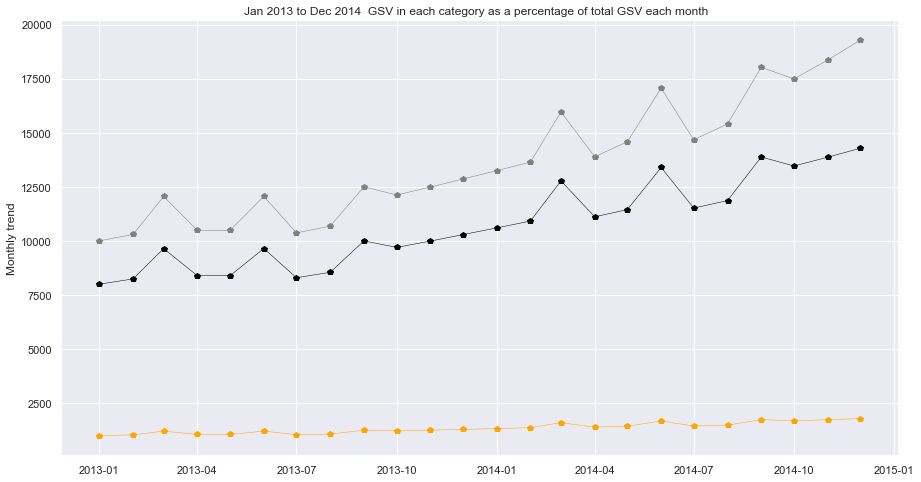

In [232]:
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 8)})

#ax.plot(categorynadmin['gsvperct'],linewidth=.5,color='Red',marker='o',linestyle='-') 
#ax.plot(categoryndesign['gsvperct'],linewidth=.5,color='Blue',marker='o',linestyle='-') 
#ax.plot(categorynIT['gsvperct'],linewidth=.5,color='Green',marker='o',linestyle='-') 
ax.plot(categorynadmin['Jobs Posted'],linewidth=.5,color='Black',marker='p',linestyle='-') 
ax.plot(categoryndesign['Jobs Posted'],linewidth=.5,color='Orange',marker='p',linestyle='-') 
ax.plot(categorynIT['Jobs Posted'],linewidth=.5,color='Grey',marker='p',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014  GSV in each category as a percentage of total GSV each month  ')

Text(0.5, 1.0, 'Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')

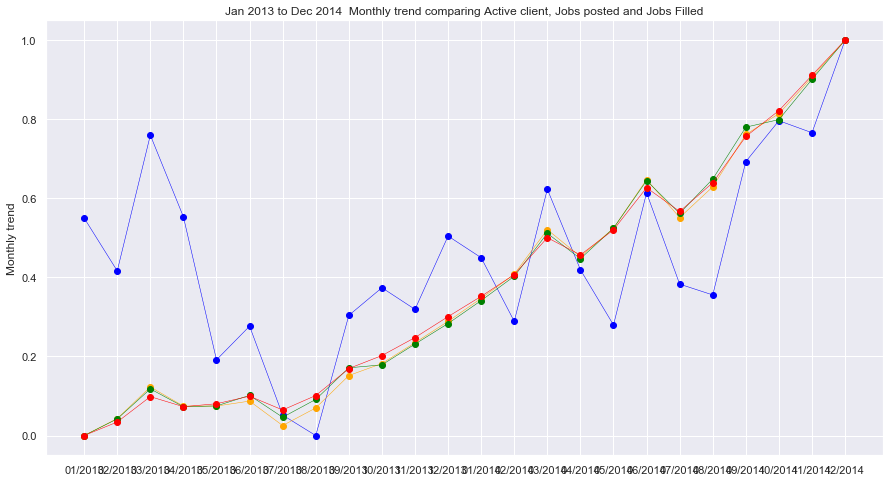

In [24]:
gsvmn
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(25, 18)})
ax.plot(gsvmeu['Active Clients scale'],linewidth=.5,color='Blue',marker='o',linestyle='-')
ax.plot(gsvmeu['Jobs Posted scale'],linewidth=.5,color='Orange',marker='o',linestyle='-')
ax.plot(gsvmeu['Jobs Filled scale'],linewidth=.5,color='Green',marker='o',linestyle='-') 
ax.plot(gsvmeu['Gross Services Value scale'],linewidth=.5,color='Red',marker='o',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014  Monthly trend comparing Active client, Jobs posted and Jobs Filled')




In [103]:
categoryeuIT['Month1'] = categoryeuIT['Month']
categoryeuIT = categoryeuIT.set_index('Month1')

In [159]:
#totaleu = gsvmeu[['Month','Gross Services Value']]
#categoryeuIT['MTotalGSV'] = totaleu['Gross Services Value']
#categoryeuIT['gsvperct'] = categoryeuIT['Gross Services Value'] / categoryeuIT['MTotalGSV']
categoryeuIT['jppctchange'] = categoryeuIT['Jobs Posted'].pct_change()


Text(0.5, 1.0, 'Jan 2013 to Dec 2014  GSV in each category as a percentage of total GSV each month  ')

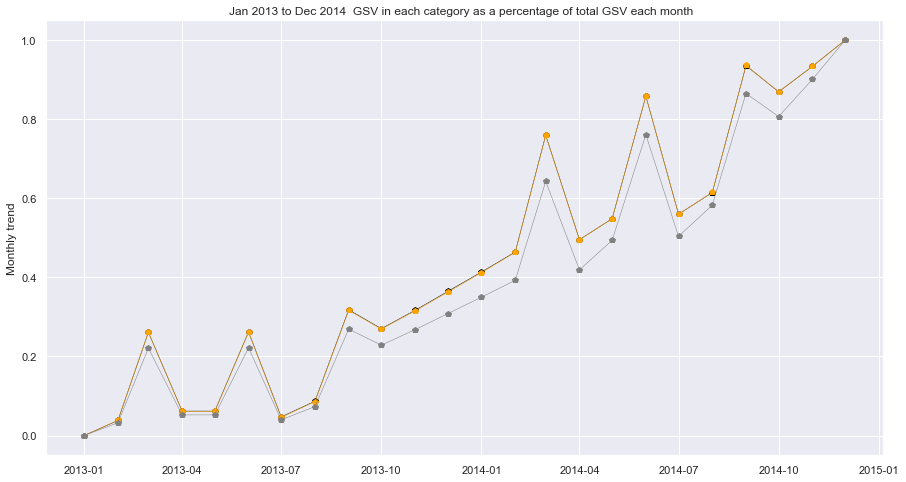

In [246]:
fig, ax = plt.subplots(1)
sns.set(rc={'figure.figsize':(15, 8)})

#ax.plot(categoryeuadmin['gsvperct'],linewidth=.5,color='Red',marker='o',linestyle='-') 
#ax.plot(categoryeudesign['gsvperct'],linewidth=.5,color='Blue',marker='o',linestyle='-') 
#ax.plot(categoryeuIT['gsvperct'],linewidth=.5,color='Green',marker='o',linestyle='-') 
ax.plot(categorynadmin['Jobs Posted scale'],linewidth=.5,color='Black',marker='p',linestyle='-') 
ax.plot(categoryndesign['Jobs Posted scale'],linewidth=.5,color='Orange',marker='p',linestyle='-') 
ax.plot(categorynIT['Jobs Posted scale'],linewidth=.5,color='Grey',marker='p',linestyle='-') 
ax.set_ylabel('Monthly trend')
ax.set_title('Jan 2013 to Dec 2014  GSV in each category as a percentage of total GSV each month  ')

In [254]:
x14 = stats.mean(gsvg[(gsvg['Month'] > '2013-12-01')]['jppctchange'].fillna(0))*100

In [255]:
y13 = stats.mean(gsvg[(gsvg['Month'] < '2014-1-01')]['jppctchange'].fillna(0))*100

In [256]:
x14

3.732069554912957

In [257]:
y13

2.5565089237108056

In [258]:
x14-y13

1.1755606312021514

In [250]:
gsvg = pd.DataFrame(gsv.groupby(['Month'],as_index=False)[['Jobs Posted','Active Clients','Jobs Filled','Gross Services Value']].sum())

In [253]:
gsvg['jppctchange'] = gsvg['Jobs Posted'].pct_change()
